## Garanti Data Camp

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from tqdm.notebook import tqdm
tqdm.pandas()

SEED = 42

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

cat_feat_colors = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"]
colors = ['#FFB6B9', '#FAE3D9', '#BBDED6', '#61C0BF', "#CCA8E9", "#F67280"]

In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [121]:
def cat_plots(dataframe, cat_col):
    print("".center(100, "#"))
    print(dataframe[cat_col].value_counts())
    print("".center(100, "#"))

    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")
    plt.suptitle(cat_col.capitalize(), size=16)
    plt.subplot(1, 3, 1)
    plt.title("Percentages")
    plt.pie(dataframe[cat_col].value_counts().values.tolist(),
            labels=dataframe[cat_col].value_counts().keys().tolist(),
            labeldistance=1.1,
            wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
            colors=colors,
            autopct='%1.0f%%')

    

    plt.subplot(1, 3, 2)
    plt.title("Countplot")
    sns.countplot(data=dataframe, x=cat_col, palette=colors)
    plt.tight_layout(pad=3)

In [143]:
train = pd.read_csv("./data/train_users.csv")

In [129]:
test = pd.read_csv("./data/test_users.csv")

In [8]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(53019, 4)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id              int64
industry            object
location            object
moved_after_2019     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location  \
0     1301  Information Technology and Services  Istanbul, Istanbul, Turkey   
1     6950                             Internet  Istanbul, Istanbul, T

In [130]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(13255, 3)
**********************************************************************
******************************* Types ********************************
**********************************************************************
user_id      int64
industry    object
location    object
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
   user_id                             industry                    location
0    17449                             Research                      Turkey
1    33967                    Computer Software  Istanbul, Istanbul, Turkey
2     2110                           Automotive    

In [10]:
train.head()

,user_id,industry,location,moved_after_2019
0,1301,Information Technology and Services,"Istanbul, Istanbul, Turkey",1
1,6950,Internet,"Istanbul, Istanbul, Turkey",0
2,4880,Online Media,Turkey,0
3,26046,Telecommunications,"Istanbul, Istanbul, Turkey",0
4,11005,Banking,"Istanbul, Turkey",0


####################################################################################################
0    32496
1    20523
Name: moved_after_2019, dtype: int64
####################################################################################################


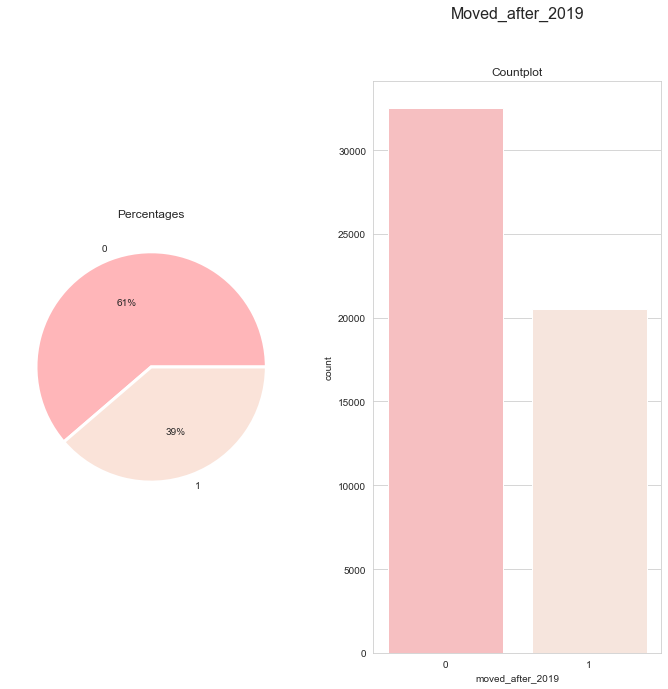

In [ ]:
cat_plots(train, "moved_after_2019")

In [28]:
train[train["location"].isna() == True]

,user_id,industry,location,moved_after_2019
41860,65204,Pharmaceuticals,NaN,0


## Raw test data

In [ ]:
train_raw = pd.read_csv("./data/train_users.csv")
test_raw = pd.read_csv("./data/test_users.csv")

In [ ]:
app_train_raw = pd.get_dummies(train_raw)
app_test_raw = pd.get_dummies(test_raw)

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 563)
Testing Features shape:  (13255, 388)


In [ ]:
labels = app_train_raw["moved_after_2019"]

app_train_raw, app_test_raw = app_train_raw.align(app_test_raw, join = 'inner', axis = 1)

app_train_raw['moved_after_2019'] = labels

print('Training Features shape: ', app_train_raw.shape)
print('Testing Features shape: ', app_test_raw.shape)

Training Features shape:  (53019, 364)
Testing Features shape:  (13255, 363)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train_raw:
    train = app_train_raw.drop(columns = ['moved_after_2019'])
else:
    train = app_train_raw.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test_raw.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test_raw)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 363)
Testing data shape:  (13255, 363)


In [ ]:
X = app_train_raw.drop(["moved_after_2019"], axis=1)
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [ ]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


## Test data location feature eng

In [39]:
province={
"1.0" : "Adana",
"2.0" : "Adıyaman",
"3.0" : "Afyonkarahisar",
"4.0" : "Ağrı",
"5.0" : "Amasya",
"6.0" : "Ankara",
"7.0" : "Antalya",
"8.0" : "Artvin",
"9.0" : "Aydın",
"10.0" : "Balıkesir",
"11.0" : "Bilecik",
"12.0" : "Bingöl",
"13.0" : "Bitlis",
"14.0" : "Bolu",
"15.0" : "Burdur",
"16.0" : "Bursa",
"17.0" : "Çanakkale",
"18.0" : "Çankırı",
"19.0" : "Çorum",
"20.0" : "Denizli",
"21.0" : "Diyarbakır",
"22.0" : "Edirne",
"23.0" : "Elâzığ",
"24.0" : "Erzincan",
"25.0" : "Erzurum",
"26.0" : "Eskişehir",
"27.0" : "Gaziantep",
"28.0" : "Giresun",
"29.0" : "Gümüşhane",
"30.0" : "Hakkâri",
"31.0" : "Hatay",
"32.0" : "Isparta",
"33.0" : "Mersin",
"34.0" : "İstanbul",
"35.0" : "İzmir",
"36.0" : "Kars",
"37.0" : "Kastamonu",
"38.0" : "Kayseri",
"39.0" : "Kırklareli",
"40.0" : "Kırşehir",
"41.0" : "Kocaeli",
"42.0" : "Konya",
"43.0" : "Kütahya",
"44.0" : "Malatya",
"45.0" : "Manisa",
"46.0" : "Kahramanmaraş",
"47.0" : "Mardin",
"48.0" : "Muğla",
"49.0" : "Muş",
"50.0" : "Nevşehir",
"51.0" : "Niğde",
"52.0" : "Ordu",
"53.0" : "Rize",
"54.0" : "Sakarya",
"55.0" : "Samsun",
"56.0" : "Siirt",
"57.0" : "Sinop",
"58.0" : "Sivas",
"59.0" : "Tekirdağ",
"60.0" : "Tokat",
"61.0" : "Trabzon",
"62.0" : "Tunceli",
"63.0" : "Şanlıurfa",
"64.0" : "Uşak",
"65.0" : "Van",
"66.0" : "Yozgat",
"67.0" : "Zonguldak",
"68.0" : "Aksaray",
"69.0" : "Bayburt",
"70.0" : "Karaman",
"71.0" : "Kırıkkale",
"72.0" : "Batman",
"73.0" : "Şırnak",
"74.0" : "Bartın",
"75.0" : "Ardahan",
"76.0" : "Iğdır",
"77.0" : "Yalova",
"78.0" : "Karabük",
"79.0" : "Kilis",
"80.0" : "Osmaniye",
"81.0" : "Düzce"
}


In [132]:
import swifter
from unidecode import unidecode

def check_string(string_to_check):
    string_to_check = unidecode(str(string_to_check).lower())
    if "," in string_to_check:
        sub = string_to_check.split(", ")
    else:
        sub = string_to_check.split()

    sub_dict = dict((v,unidecode(k.lower())) for v, k in province.items())

    for val in sub:
        if val in sub_dict.values():
            return val
        else:
            continue
    return val


#df['result'] = df['string_to_check'].apply(check_string)

In [144]:
train["user_location"] = train["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/53019 [00:00<?, ?it/s]

In [135]:
test["user_location"] = test["location"].swifter.apply(check_string)

Pandas Apply:   0%|          | 0/13255 [00:00<?, ?it/s]

In [145]:
train["user_location"] = train["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [147]:
test["user_location"] = test["user_location"].replace(['kingdom','states'],['united kingdom', 'united states'])


In [149]:
train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         141
location         420
user_location     94
dtype: int64

In [150]:
test.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

industry         128
location         259
user_location     64
dtype: int64

In [152]:
train.drop(columns="location", inplace=True)
test.drop(columns="location", inplace=True)

In [153]:
app_train = pd.get_dummies(train)
app_test = pd.get_dummies(test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 237)
Testing Features shape:  (13255, 193)


In [155]:
labels = app_train["moved_after_2019"]

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['moved_after_2019'] = labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (53019, 194)
Testing Features shape:  (13255, 193)


In [157]:
correlations = app_train.corr()['moved_after_2019'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 industry_Fine Art                               0.009466
industry_Financial Services                     0.010671
user_location_philippines                       0.012220
industry_Think Tanks                            0.012306
industry_Higher Education                       0.012504
industry_Restaurants                            0.013197
user_location_ankara                            0.015855
industry_Entertainment                          0.017716
industry_Aviation & Aerospace                   0.019422
industry_Political Organization                 0.020450
industry_Defense & Space                        0.029694
industry_Information Technology and Services    0.036407
industry_Internet                               0.037546
user_location_istanbul                          0.068572
moved_after_2019                                1.000000
Name: moved_after_2019, dtype: float64

Most Negative Correlations:
 user_location_turkey                           

In [160]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

if 'moved_after_2019' in app_train:
    train = app_train.drop(columns = ['moved_after_2019'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (53019, 193)
Testing data shape:  (13255, 193)


In [202]:
X = app_train.drop(["moved_after_2019"], axis=1)
y = labels

In [203]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

In [204]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)

# Train on the training data
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.0001, random_state=42)

In [205]:
y_pred_test = log_reg.predict(X_test)

y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [206]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.6105


In [207]:
log_reg = LogisticRegression(C = 0.0001, random_state=SEED)
log_reg.fit(app_train.drop(columns="moved_after_2019"), labels)

y_pred_test = log_reg.predict(app_test)


In [208]:
submit = app_test[['user_id']]
submit['moved_after_2019'] = y_pred_test

submit.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [209]:
submit.moved_after_2019.value_counts()

0    13255
Name: moved_after_2019, dtype: int64

In [211]:
submit.to_csv('log_reg_baseline.csv', index = False)

In [212]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [213]:
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.9s finished


In [214]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [215]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5782


In [227]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)

In [228]:
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.6s finished


In [229]:
y_pred_test = random_forest.predict(X_test)

y_pred_test

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [230]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5969


In [238]:
app_train.to_csv("train_train_user_fe.csv")
app_test.to_csv("test_test_user_fe.csv")

## TODO: language.csv - **agg** - profiency ordinal

In [37]:
train = pd.read_csv("./train_train_user_fe.csv")
test = pd.read_csv("./test_test_user_fe.csv")

In [38]:
X_train_user_id = train["user_id"]
X_test_user_id = test["user_id"]

y = train["moved_after_2019"]
X = train.drop(columns=["Unnamed: 0", "moved_after_2019", "user_id"])

In [39]:
test.drop(columns=["Unnamed: 0", "user_id"], inplace=True)

In [11]:

from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=925)
cv_splits = list(skf.split(X, y))

In [12]:
cv_splits

[(array([    0,     1,     2, ..., 53015, 53017, 53018]),
  array([   14,    15,    21, ..., 52994, 52996, 53016])),
 (array([    0,     1,     2, ..., 53015, 53016, 53017]),
  array([    9,    16,    29, ..., 53008, 53010, 53018])),
 (array([    0,     1,     3, ..., 53016, 53017, 53018]),
  array([    2,     4,     7, ..., 52950, 53003, 53005])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    3,    12,    20, ..., 53006, 53012, 53013])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   13,    22,    24, ..., 52997, 52998, 53014])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([    5,     6,    11, ..., 52995, 53007, 53015])),
 (array([    2,     3,     4, ..., 53015, 53016, 53018]),
  array([    0,     1,     8, ..., 53009, 53011, 53017])),
 (array([    0,     1,     2, ..., 53016, 53017, 53018]),
  array([   10,    11,    13, ..., 52990, 52998, 53005])),
 (array([    1,     2,     3, ..., 53015, 53017, 53018]),
  arra

In [40]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, recall_score, precision_score, accuracy_score

auc_errs = []
ap_errs = []
prec_errs = []
recall_errs = []
f1_errs = []
acc_scores = []

models = []

kf = KFold(n_splits=10)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)
    print("Positive Count in Val Split:", y_val.sum())

    model = RandomForestClassifier(n_estimators = 100, random_state = SEED, verbose = 1, n_jobs = -1)
    

    model.fit(
        X_train,
        y_train
    )
    
    preds = model.predict(X_val)
    pred_probas = model.predict_proba(X_val)[:,1]

    print("Positive Count in Predictions:", preds.sum())
    
    acc = accuracy_score(y_val, preds)
    print("Accuracy: ", acc)
    acc_scores.append(acc)
    
    f1_err = f1_score(y_val, preds)
    print("Fold F1: ", f1_err)
    f1_errs.append(f1_err)

    prec_err = precision_score(y_val, preds)
    print("Fold Precision: ", prec_err)
    prec_errs.append(prec_err)

    recall_err = recall_score(y_val, preds)
    print("Fold Recall: ", recall_err)
    recall_errs.append(recall_err)
    
    auc_err = roc_auc_score(y_val, pred_probas)
    print("Fold AUC: ", auc_err)
    auc_errs.append(auc_err)

    ap_err = average_precision_score(y_val, pred_probas)
    print("Fold AP: ", ap_err)
    ap_errs.append(ap_err)
    
    models.append(model)
    
    print("\n", "*"*70, "\n")

    

    

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2070


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 332
Accuracy:  0.6141078838174274
Fold F1:  0.14820982514571193
Fold Precision:  0.536144578313253
Fold Recall:  0.08599033816425121
Fold AUC:  0.5759936863251542
Fold AP:  0.4600545632327061

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2063


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 294
Accuracy:  0.6127876273104489
Fold F1:  0.12897751378871447
Fold Precision:  0.5170068027210885
Fold Recall:  0.07367910809500727
Fold AUC:  0.584945025162162
Fold AP:  0.4563383925936114

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1989


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6299509619011694
Fold F1:  0.14695652173913043
Fold Precision:  0.5434083601286174
Fold Recall:  0.08496732026143791
Fold AUC:  0.5798427724352335
Fold AP:  0.4460228306183488

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 1990


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.3s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 326
Accuracy:  0.6280648811769144
Fold F1:  0.1485319516407599
Fold Precision:  0.5276073619631901
Fold Recall:  0.0864321608040201
Fold AUC:  0.5894453396208094
Fold AP:  0.4495780203091276

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2061


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 304
Accuracy:  0.6207091663523199
Fold F1:  0.1496828752642706
Fold Precision:  0.5822368421052632
Fold Recall:  0.0858806404657933
Fold AUC:  0.588480307726349
Fold AP:  0.4693834272285659

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2025


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 309
Accuracy:  0.6208977744247454
Fold F1:  0.13881748071979436
Fold Precision:  0.5242718446601942
Fold Recall:  0.08
Fold AUC:  0.5599528324988604
Fold AP:  0.4389932404028397

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2095


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 311
Accuracy:  0.6046774801961524
Fold F1:  0.1288445552784705
Fold Precision:  0.4983922829581994
Fold Recall:  0.07398568019093078
Fold AUC:  0.5791031402815887
Fold AP:  0.4572245516290771

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Positive Count in Predictions: 322
Accuracy:  0.6203319502074689
Fold F1:  0.15809284818067754
Fold Precision:  0.5869565217391305
Fold Recall:  0.09134847752537457
Fold AUC:  0.6028576139876995
Fold AP:  0.47785294925329597

 ********************************************************************** 

Train shape: (47717, 192) | Val Shape: (5302, 192)
Positive Count in Val Split: 2069


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 305
Accuracy:  0.6080724254998114
Fold F1:  0.12468407750631846
Fold Precision:  0.4852459016393443
Fold Recall:  0.07153214113098115
Fold AUC:  0.5811057340198056
Fold AP:  0.44902255581847456

 ********************************************************************** 

Train shape: (47718, 192) | Val Shape: (5301, 192)
Positive Count in Val Split: 2092


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.6s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


Positive Count in Predictions: 324
Accuracy:  0.6049801924165252
Fold F1:  0.13327814569536423
Fold Precision:  0.49691358024691357
Fold Recall:  0.07695984703632887
Fold AUC:  0.5851540421388937
Fold AP:  0.46149468753898915

 ********************************************************************** 



[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [41]:
print("CV STATS")
print("-"*40)
print("Acc:", np.mean(acc_scores), np.std(acc_scores))
print("F1:", np.mean(f1_errs), np.std(f1_errs))
print("Precision:", np.mean(prec_errs), np.std(prec_errs))
print("Recall:", np.mean(recall_errs), np.std(recall_errs))
print("AUC:", np.mean(auc_errs), np.std(auc_errs))
print("AP:", np.mean(ap_errs), np.std(ap_errs))

CV STATS
----------------------------------------
Acc: 0.6164580343302983 0.00854051795407879
F1: 0.14060757949592123 0.01064473875137668
Precision: 0.5298184076475195 0.032394430343131365
Recall: 0.08107757136741252 0.006409073798391136
AUC: 0.5826880494196557 0.010403620062072969
AP: 0.45659652186250366 0.010863031684782403


In [42]:
import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                          pd.Series(np.mean(importance,axis=0),name="Importance")],
                         axis=1).sort_values(by='Importance',
                                             ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - CatBoost Average of Folds"
)
fig.show()


In [50]:
model_preds = [model.predict(test) for model in models]
model_preds

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0

[array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 1, 0, 0], dtype=int64)]

In [47]:

sample_submission = pd.DataFrame()
sample_submission['user_id'] = X_test_user_id
sample_submission['moved_after_2019'] = (np.mean(model_preds,axis=0)>=0.5).astype(int)

sample_submission.head()

,user_id,moved_after_2019
0,17449,0
1,33967,0
2,2110,0
3,55082,0
4,37165,0


In [56]:
sample_submission.to_csv('submission.csv',index=False)
